THis was made with ERA5 data of radiaton and wind, years 2024-2025(current). It is meant to display the best spots for clean energy proyects in LATAM.

In [ ]:
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec

from pylab import *

In [ ]:
path = '/Users/juliana/Desktop/Folder/code/proyecto/datos_proyecto/'

dict_met = {}
nombres = []

files = sorted(glob.glob(f'{path}*'))
for file in files:
    nombre = file[59:-3]
    nombres.append(nombre)
    try:
        ds = xr.open_dataset(file)
        dict_met[nombre] = ds.sortby('valid_time')
    except Exception as e:
        print(f"Error cargando {file}: {e}")

# Radiación

In [ ]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

Radiación solar mensual 2024 con matplotlib:

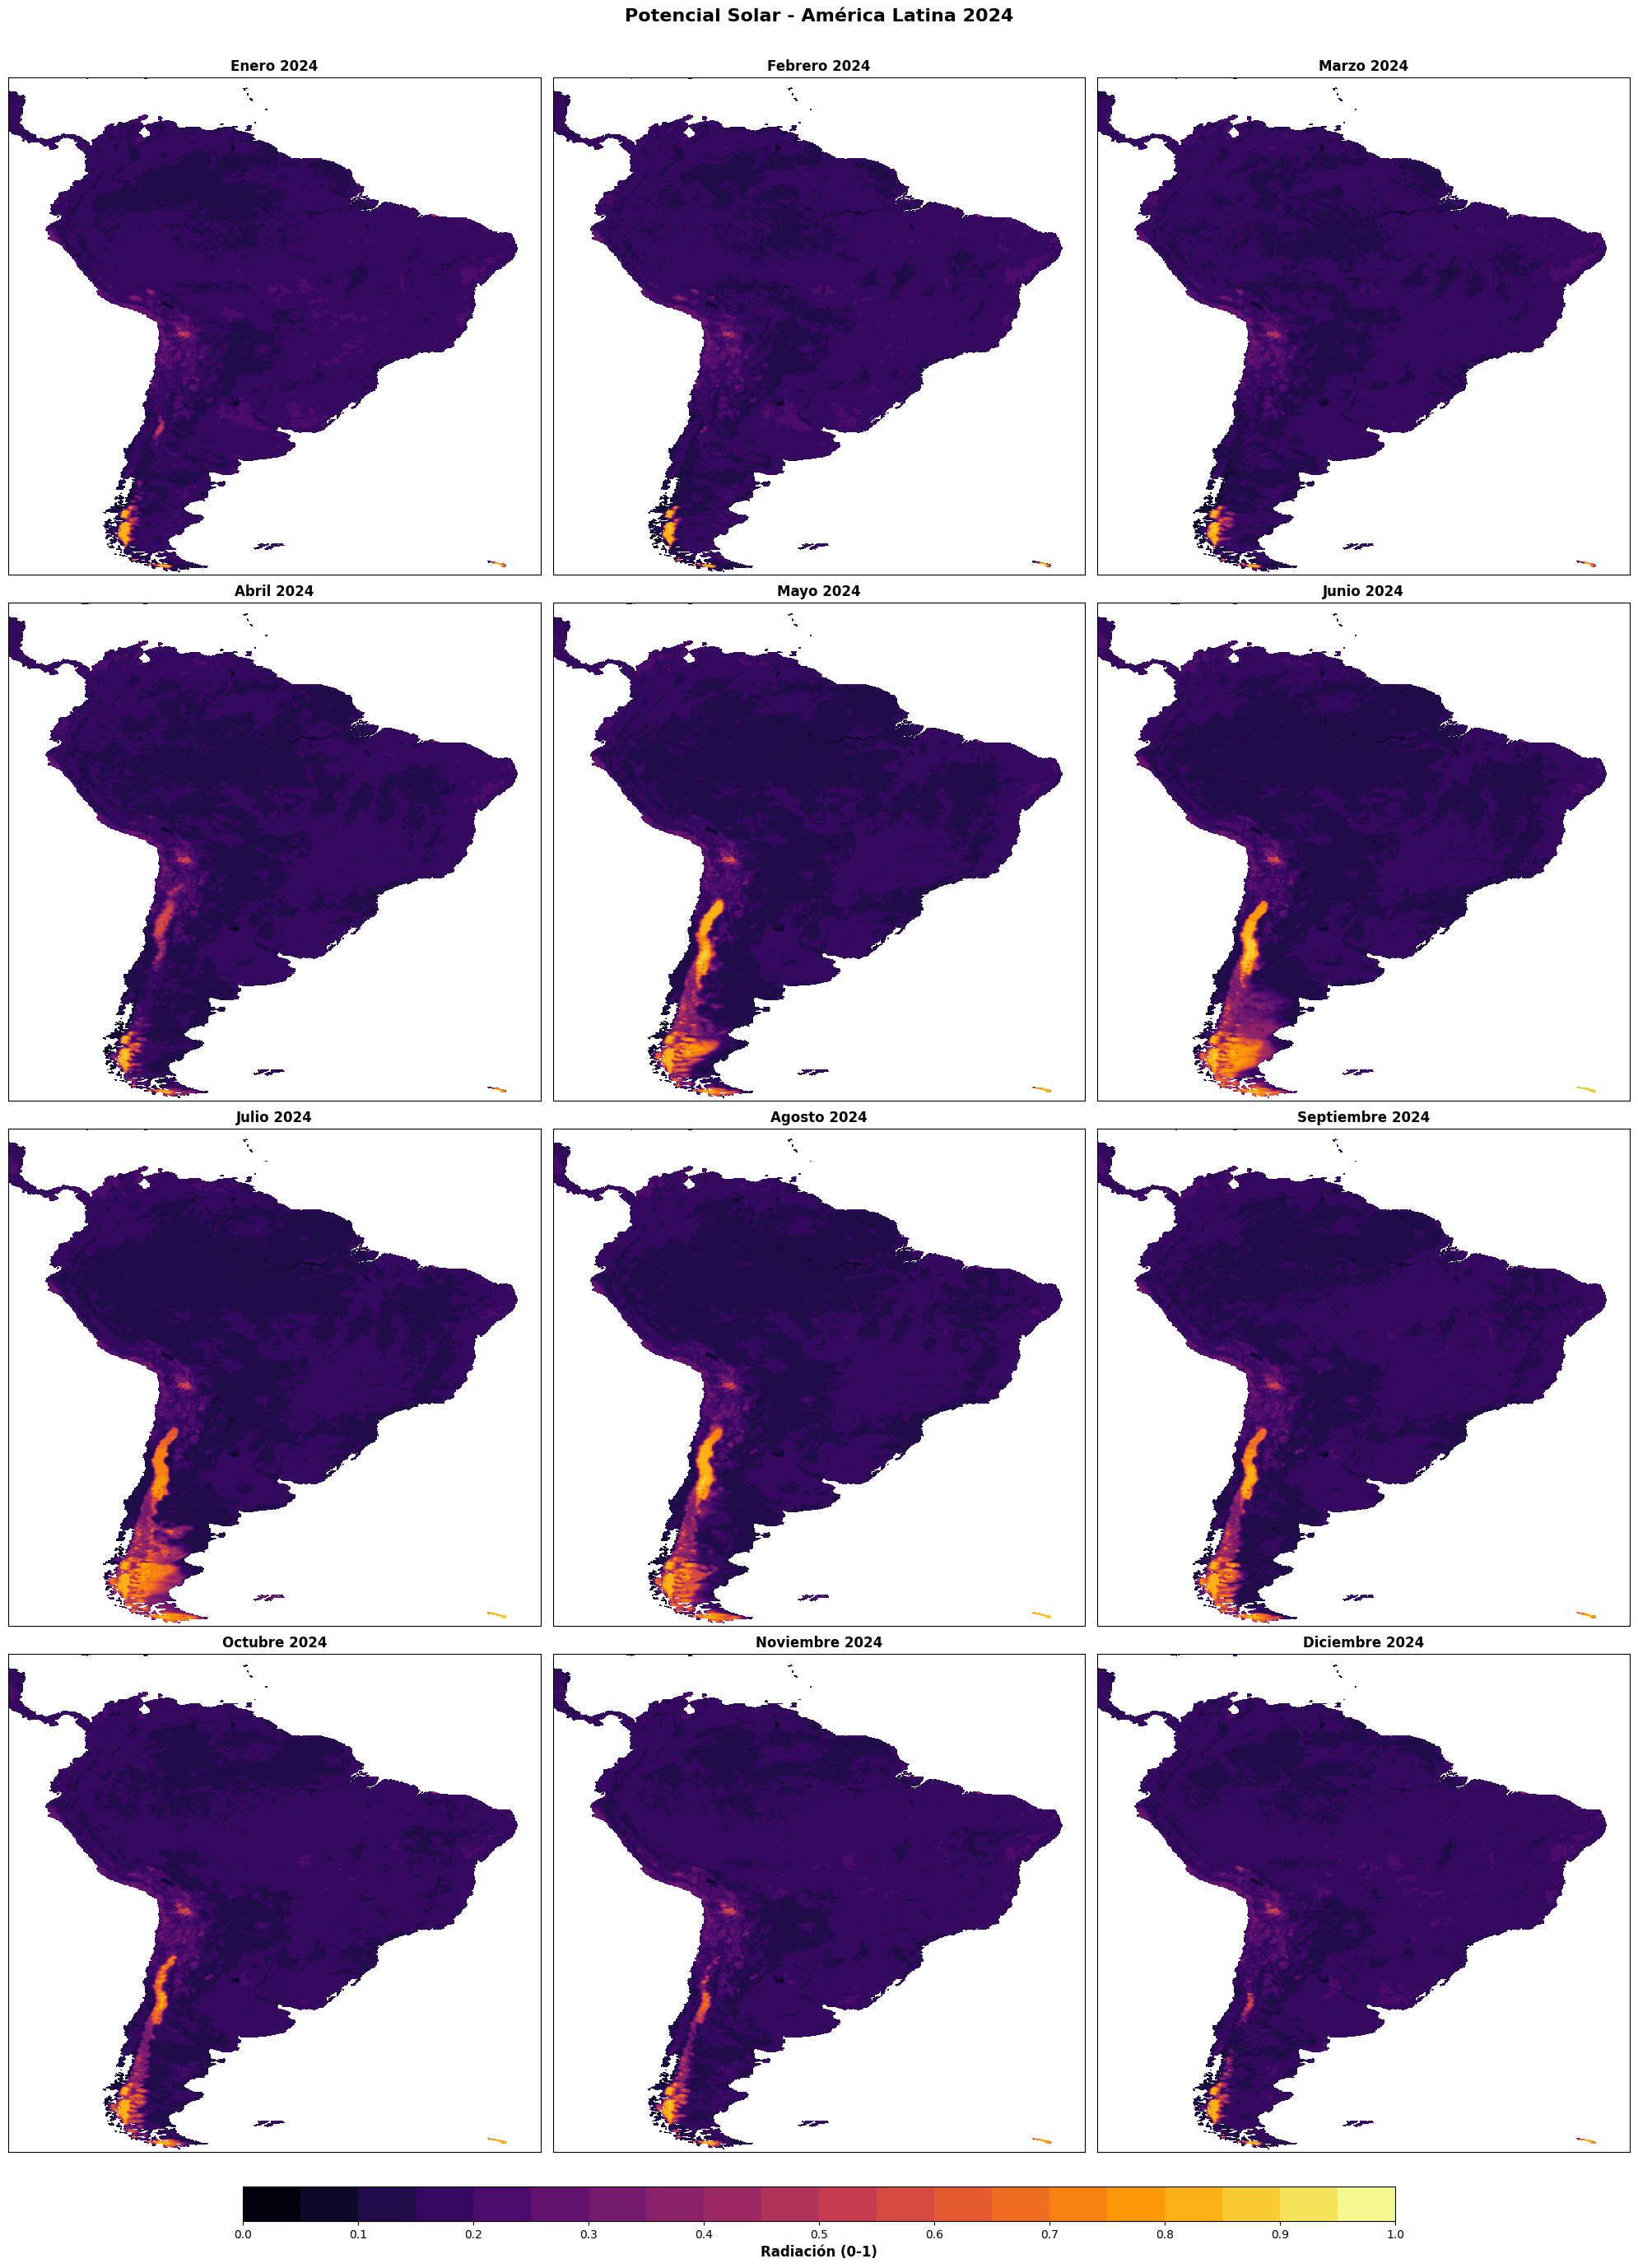

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20, 28))
axes = axes.flatten()
levels = np.linspace(0, 1, 21)
mappables = []

for i, month_num in enumerate(range(0, 12)):
    key = f"{month_num:02d}_24"
    if key in dict_met:
        data = (dict_met[key].fal.mean(dim='valid_time'))

        mesh = axes[i].contourf(data.longitude, data.latitude, data,
                               levels=levels, cmap='inferno')
        axes[i].set_title(f'{months[i]} 2024', fontweight='bold')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

        mappables.append(mesh)

plt.tight_layout()
cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.015])

if mappables:
    cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Radiación (0-1)', fontsize=12, fontweight='bold')
    cbar.set_ticks(np.arange(0, 1.1, 0.1))

plt.subplots_adjust(top=0.95, bottom=0.05)
plt.suptitle('Potencial Solar - América Latina 2024', fontsize=16, fontweight='bold')
plt.show()

Radiación solar mensual de 2025 con proyección cartográfica

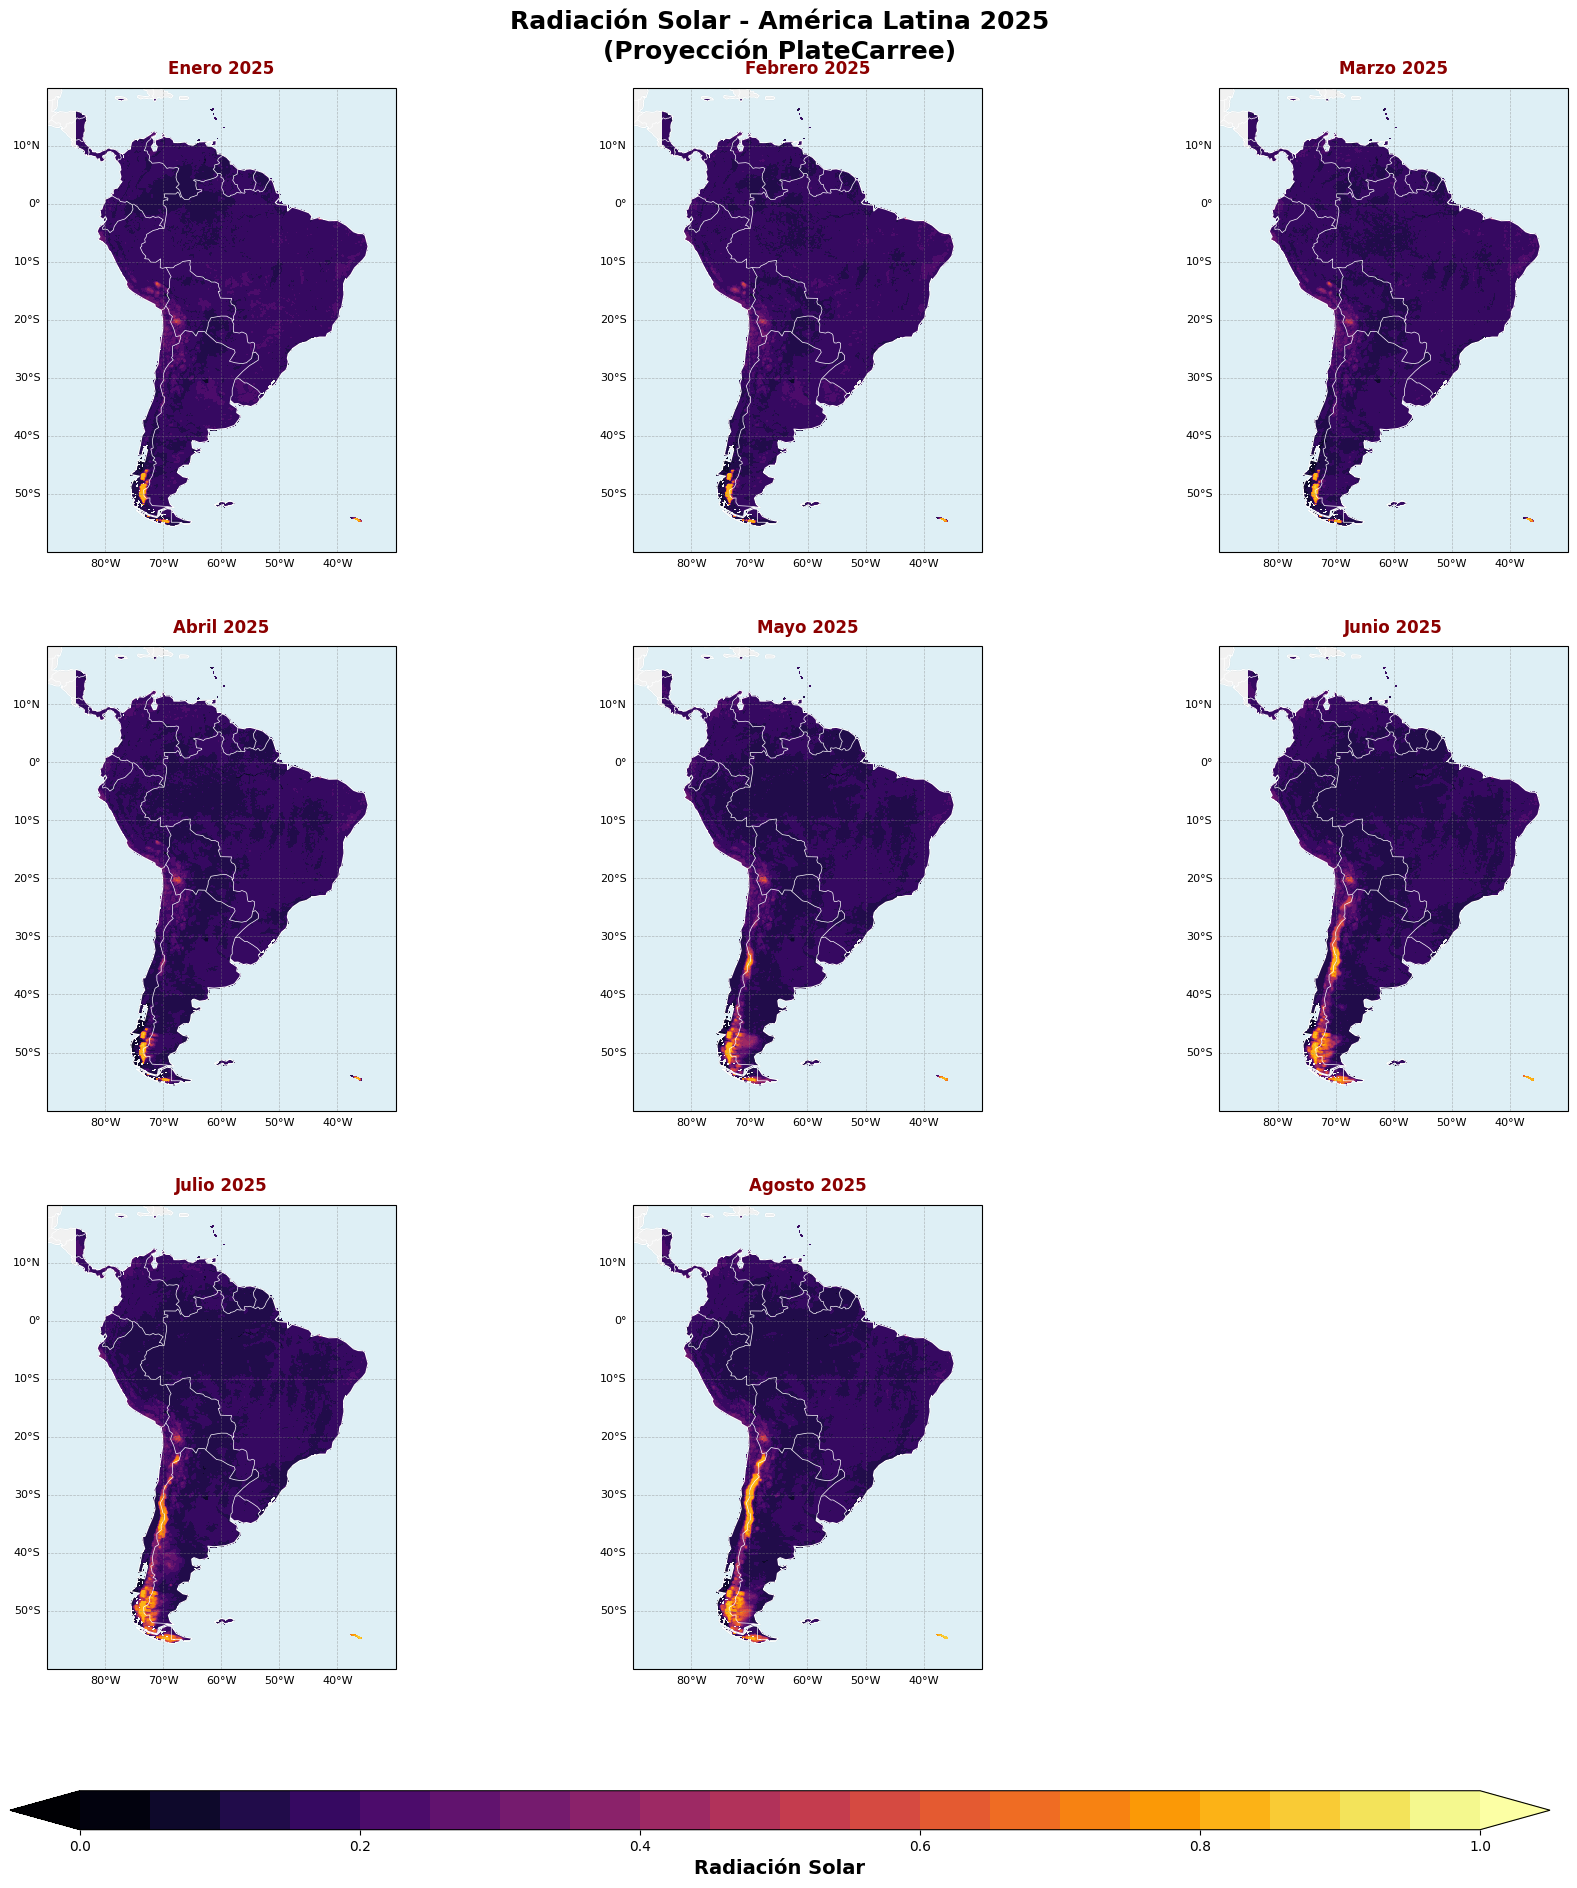

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(22, 26))
gs = GridSpec(5, 3, height_ratios=[1, 1, 1, 1, 0.06], hspace=0.25, wspace=0.1,top=0.95, bottom=0.08)

mappables = []

for i, month_num in enumerate(range(0, 8)):
    key = f"{month_num:02d}_25"

    if key in dict_met:
        data = dict_met[key].fal.mean(dim='valid_time')
        ax = fig.add_subplot(gs[i], projection=proj)

        mesh = ax.contourf(data.longitude, data.latitude, data,
                          transform=proj,
                          levels=np.linspace(0, 1, 21),
                          cmap='inferno',
                          extend='both')

        ax.coastlines(linewidth=0.8, color='white')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='white')
        ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)
        ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.3)

        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                         alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}

        ax.set_extent([-90, -30, -60, 20], crs=proj)
        ax.set_title(f'{months[i]}', fontweight='bold', fontsize=12,
                    pad=10, color='darkred')

        mappables.append(mesh)

cbar_ax = fig.add_axes([0.15, 0.28, 0.7, 0.015])
cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('Radiación Solar', fontsize=14, fontweight='bold')
cbar.set_ticks(np.arange(0, 1.1, 0.2))

plt.suptitle('Radiación Solar - América Latina 2025\n(Proyección PlateCarree)',
             fontsize=18, fontweight='bold', y=0.98)

plt.show()

Radiación solar por temporadas en 2024 con proyección cartográfica

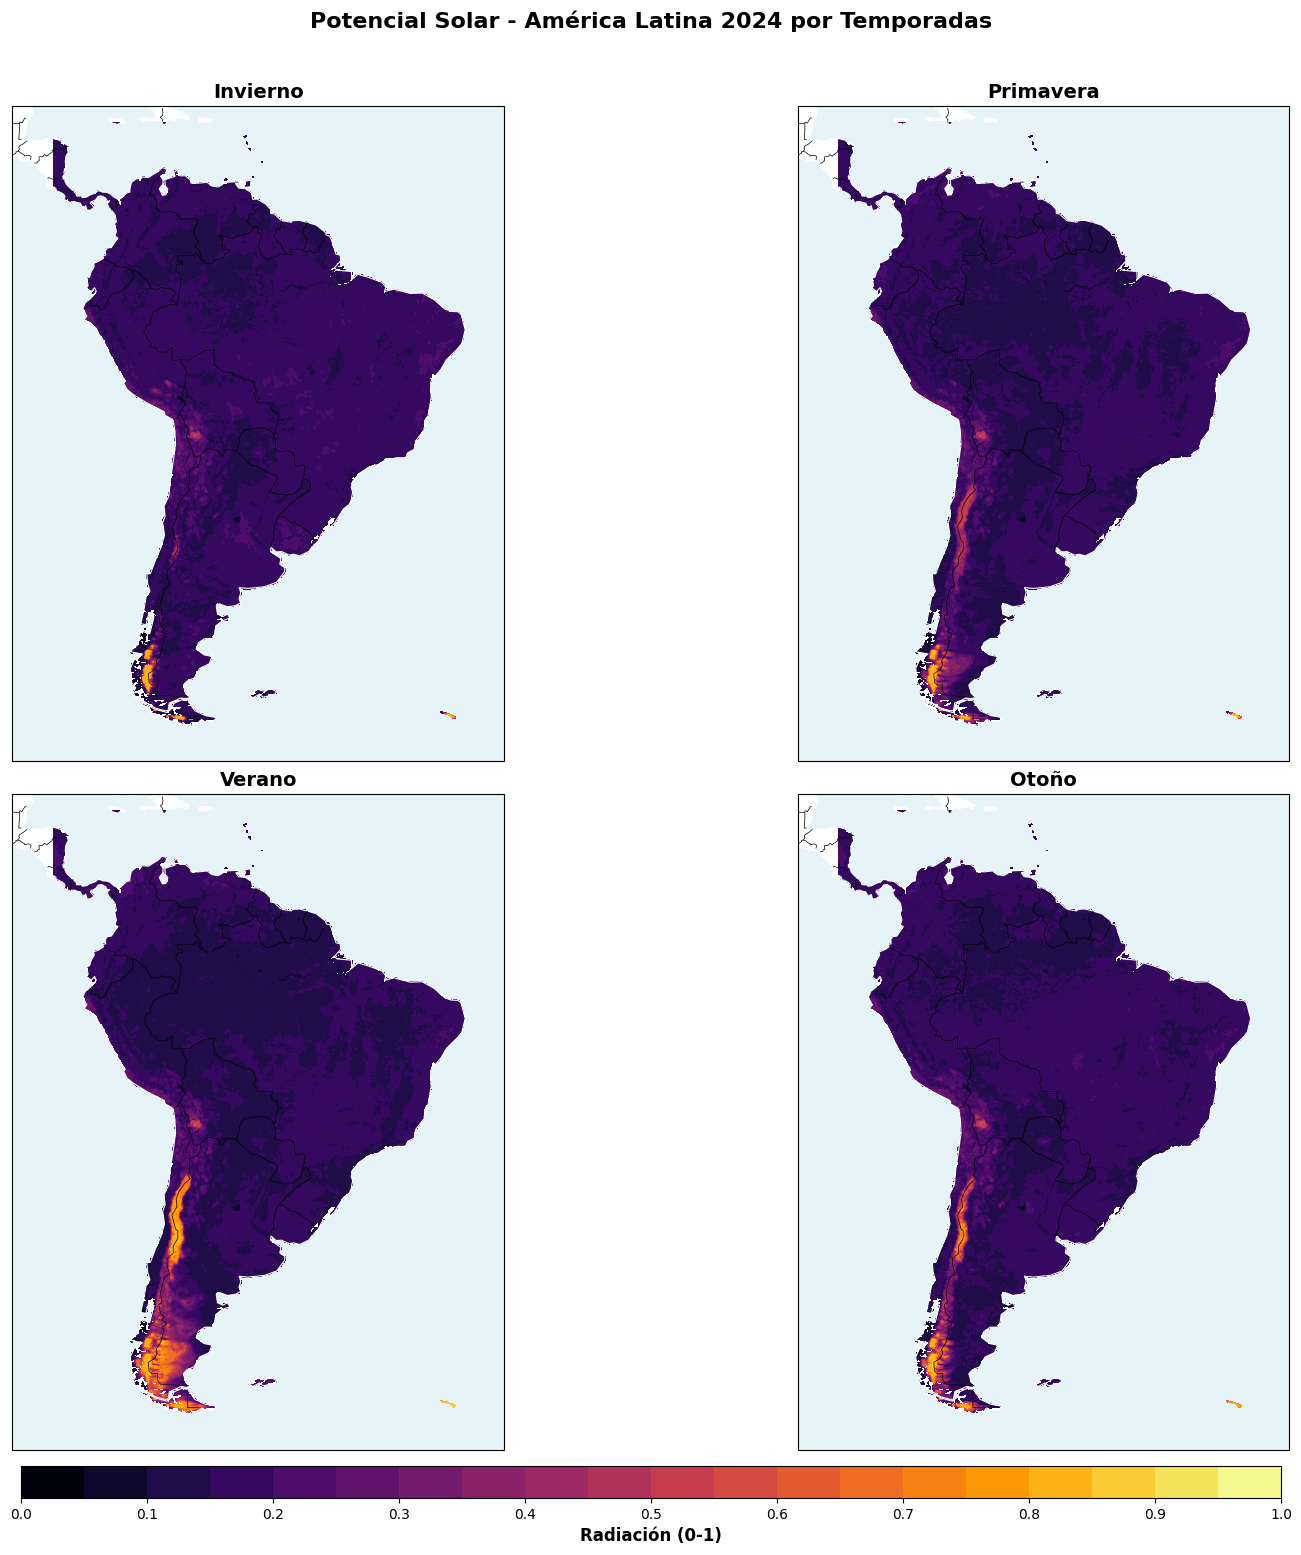

In [ ]:
estaciones = {
    'Invierno': ['11', '00', '01'],
    'Primavera': ['02', '03', '04'],
    'Verano': ['05', '06', '07'],
    'Otoño': ['08', '09', '10']
}


fig, axes = plt.subplots(2, 2, figsize=(18, 16),
                        subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
mappables = []

for i, (estacion, meses_estacion) in enumerate(estaciones.items()):
    datos_estacion = []

    for mes in meses_estacion:
        key = f"{int(mes):02d}_24"
        if key in dict_met:
            data_mes = dict_met[key].fal.mean(dim='valid_time')
            datos_estacion.append(data_mes)

    if datos_estacion:
        data_concat = xr.concat(datos_estacion, dim='time')
        data_estacional = data_concat.mean(dim='time')

        mesh = axes[i].contourf(data_estacional.longitude,
                               data_estacional.latitude,
                               data_estacional,
                               transform=ccrs.PlateCarree(),
                               levels=np.linspace(0, 1, 21),
                               cmap='inferno')

        axes[i].coastlines(linewidth=0.8, color='white')
        axes[i].add_feature(cfeature.BORDERS, linewidth=0.5)
        axes[i].add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)
        axes[i].add_feature(cfeature.LAND, color='white', alpha=0.2)
        axes[i].set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())
        axes[i].set_title(f'{estacion}', fontweight='bold', fontsize=14)

        mappables.append(mesh)

plt.tight_layout()

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])

if mappables:
    cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Radiación (0-1)', fontsize=12, fontweight='bold')
    cbar.set_ticks(np.arange(0, 1.1, 0.1))

plt.subplots_adjust(top=0.92, bottom=0.08)
plt.suptitle('Potencial Solar - América Latina 2024 por Temporadas',
             fontsize=16, fontweight='bold')
plt.show()

# Viento

Viento (eastward component) mensual de 2025 con proyección cartográfica

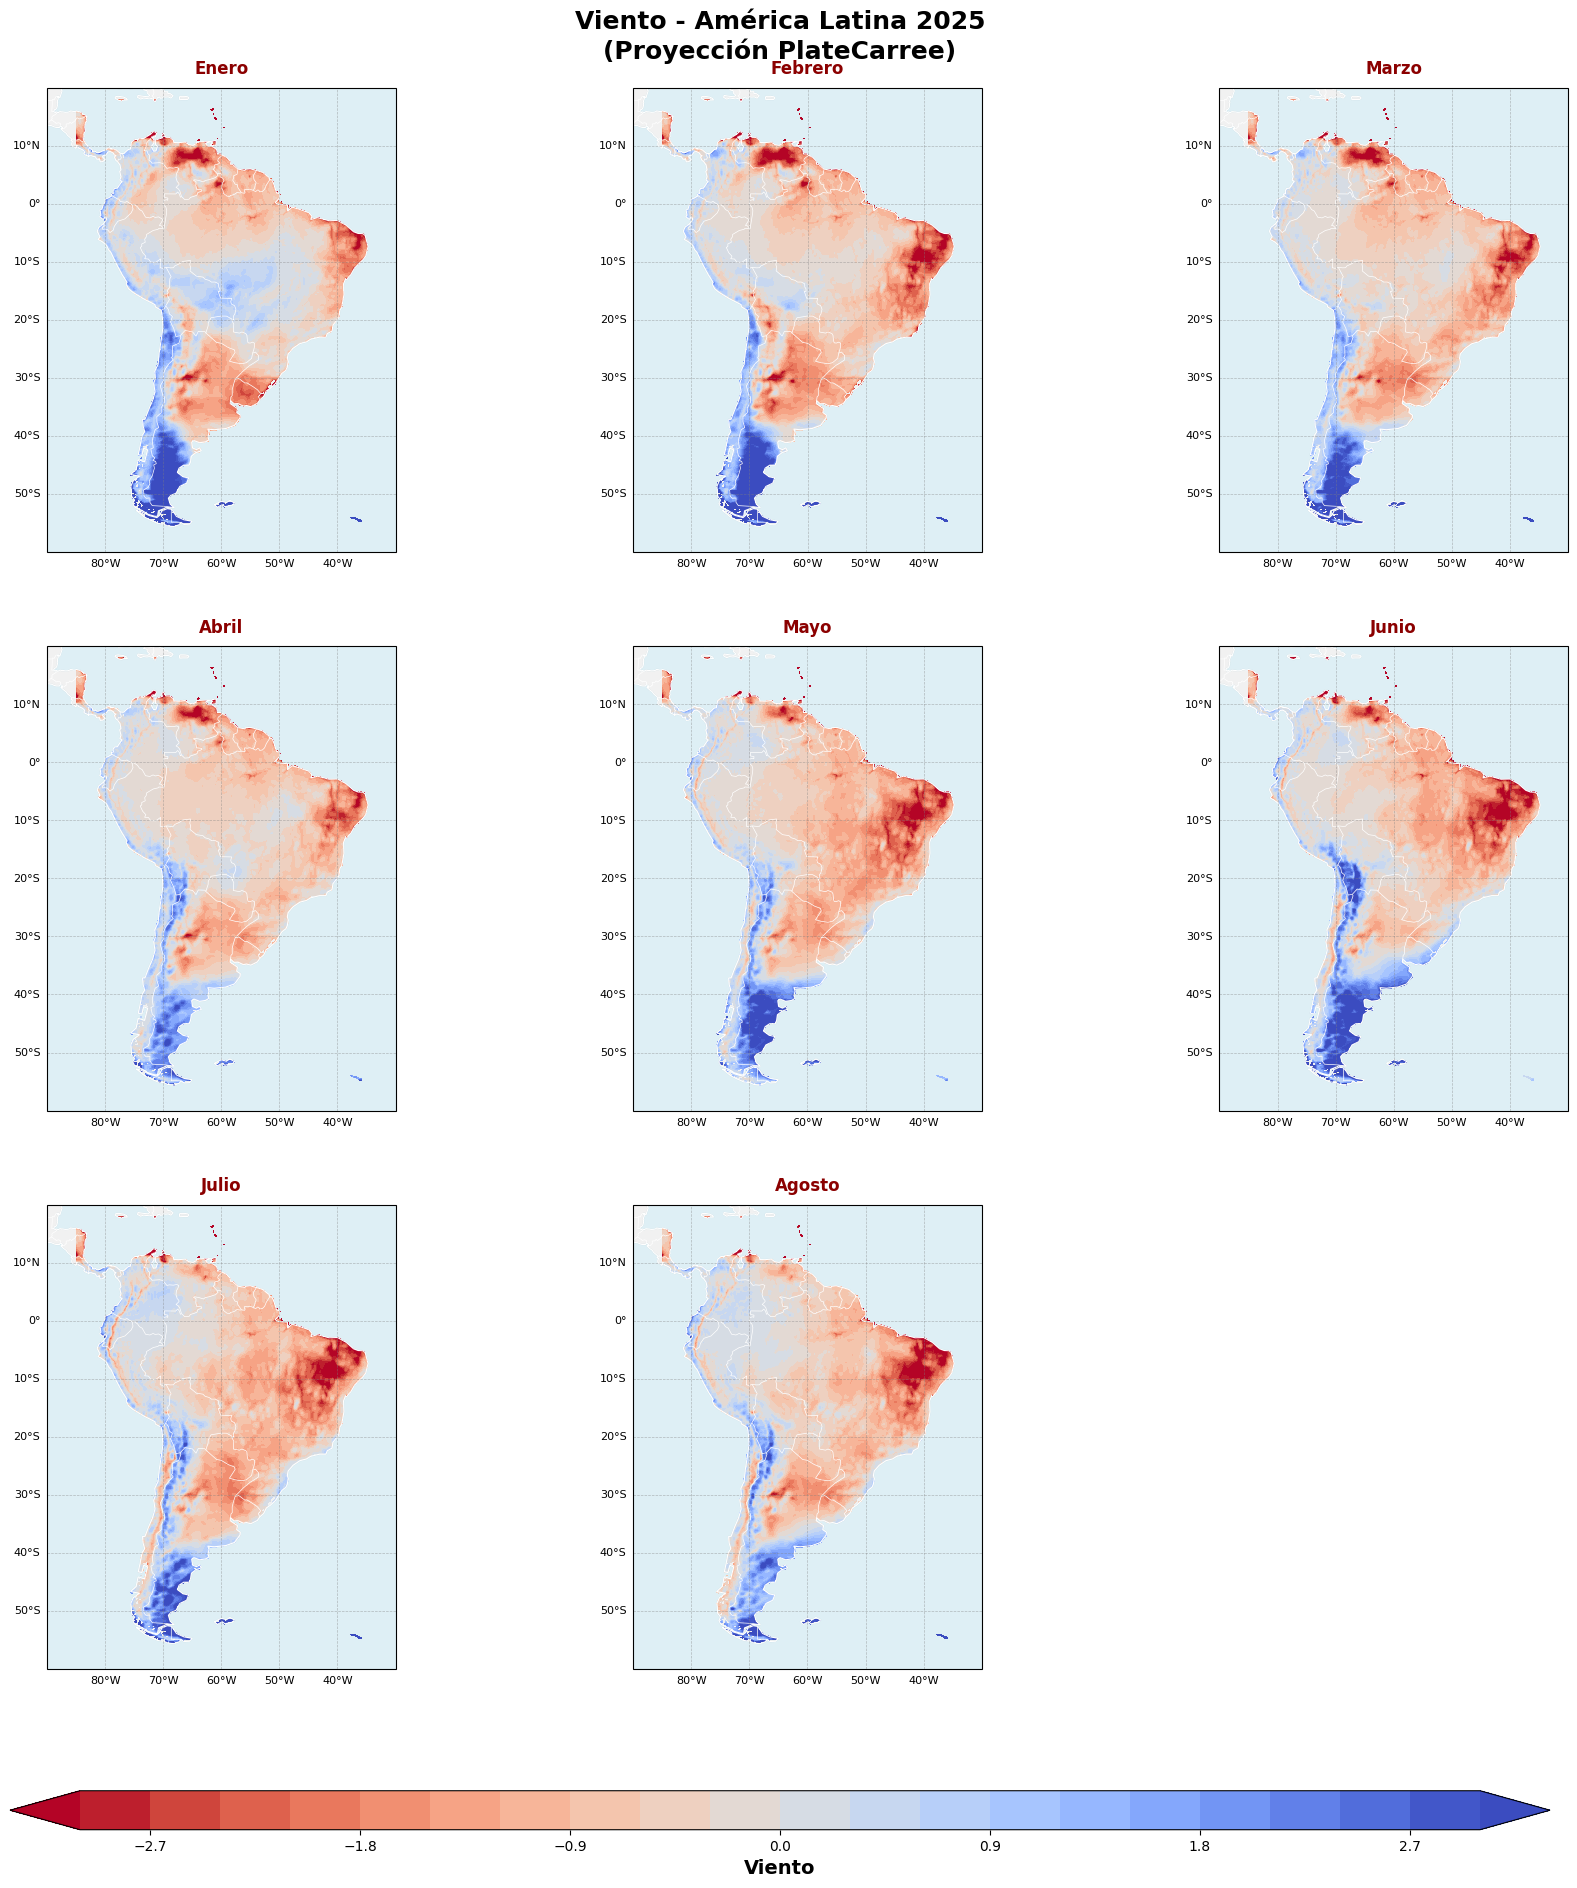

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(22, 26))
gs = GridSpec(5, 3, height_ratios=[1, 1, 1, 1, 0.06], hspace=0.25, wspace=0.1,top=0.95, bottom=0.08)

mappables = []

for i, month_num in enumerate(range(0, 8)):
    key = f"{month_num:02d}_25"

    if key in dict_met:
        data = dict_met[key].u10.mean(dim='valid_time')
        ax = fig.add_subplot(gs[i], projection=proj)

        mesh = ax.contourf(data.longitude, data.latitude, data,
                          transform=proj,
                          levels=np.linspace(-3, 3, 21),
                          cmap='coolwarm_r',
                          extend='both')

        ax.coastlines(linewidth=0.8, color='white')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='white')
        ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)
        ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.3)

        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                         alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}

        ax.set_extent([-90, -30, -60, 20], crs=proj)
        ax.set_title(f'{months[i]}', fontweight='bold', fontsize=12,
                    pad=10, color='darkred')

        mappables.append(mesh)

cbar_ax = fig.add_axes([0.15, 0.28, 0.7, 0.015])
cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('Viento', fontsize=14, fontweight='bold')

plt.suptitle('Viento - América Latina 2025\n(Proyección PlateCarree)',
             fontsize=18, fontweight='bold', y=0.98)

plt.show()

Viento (eastward component) mensual de 2024 con proyección cartográfica

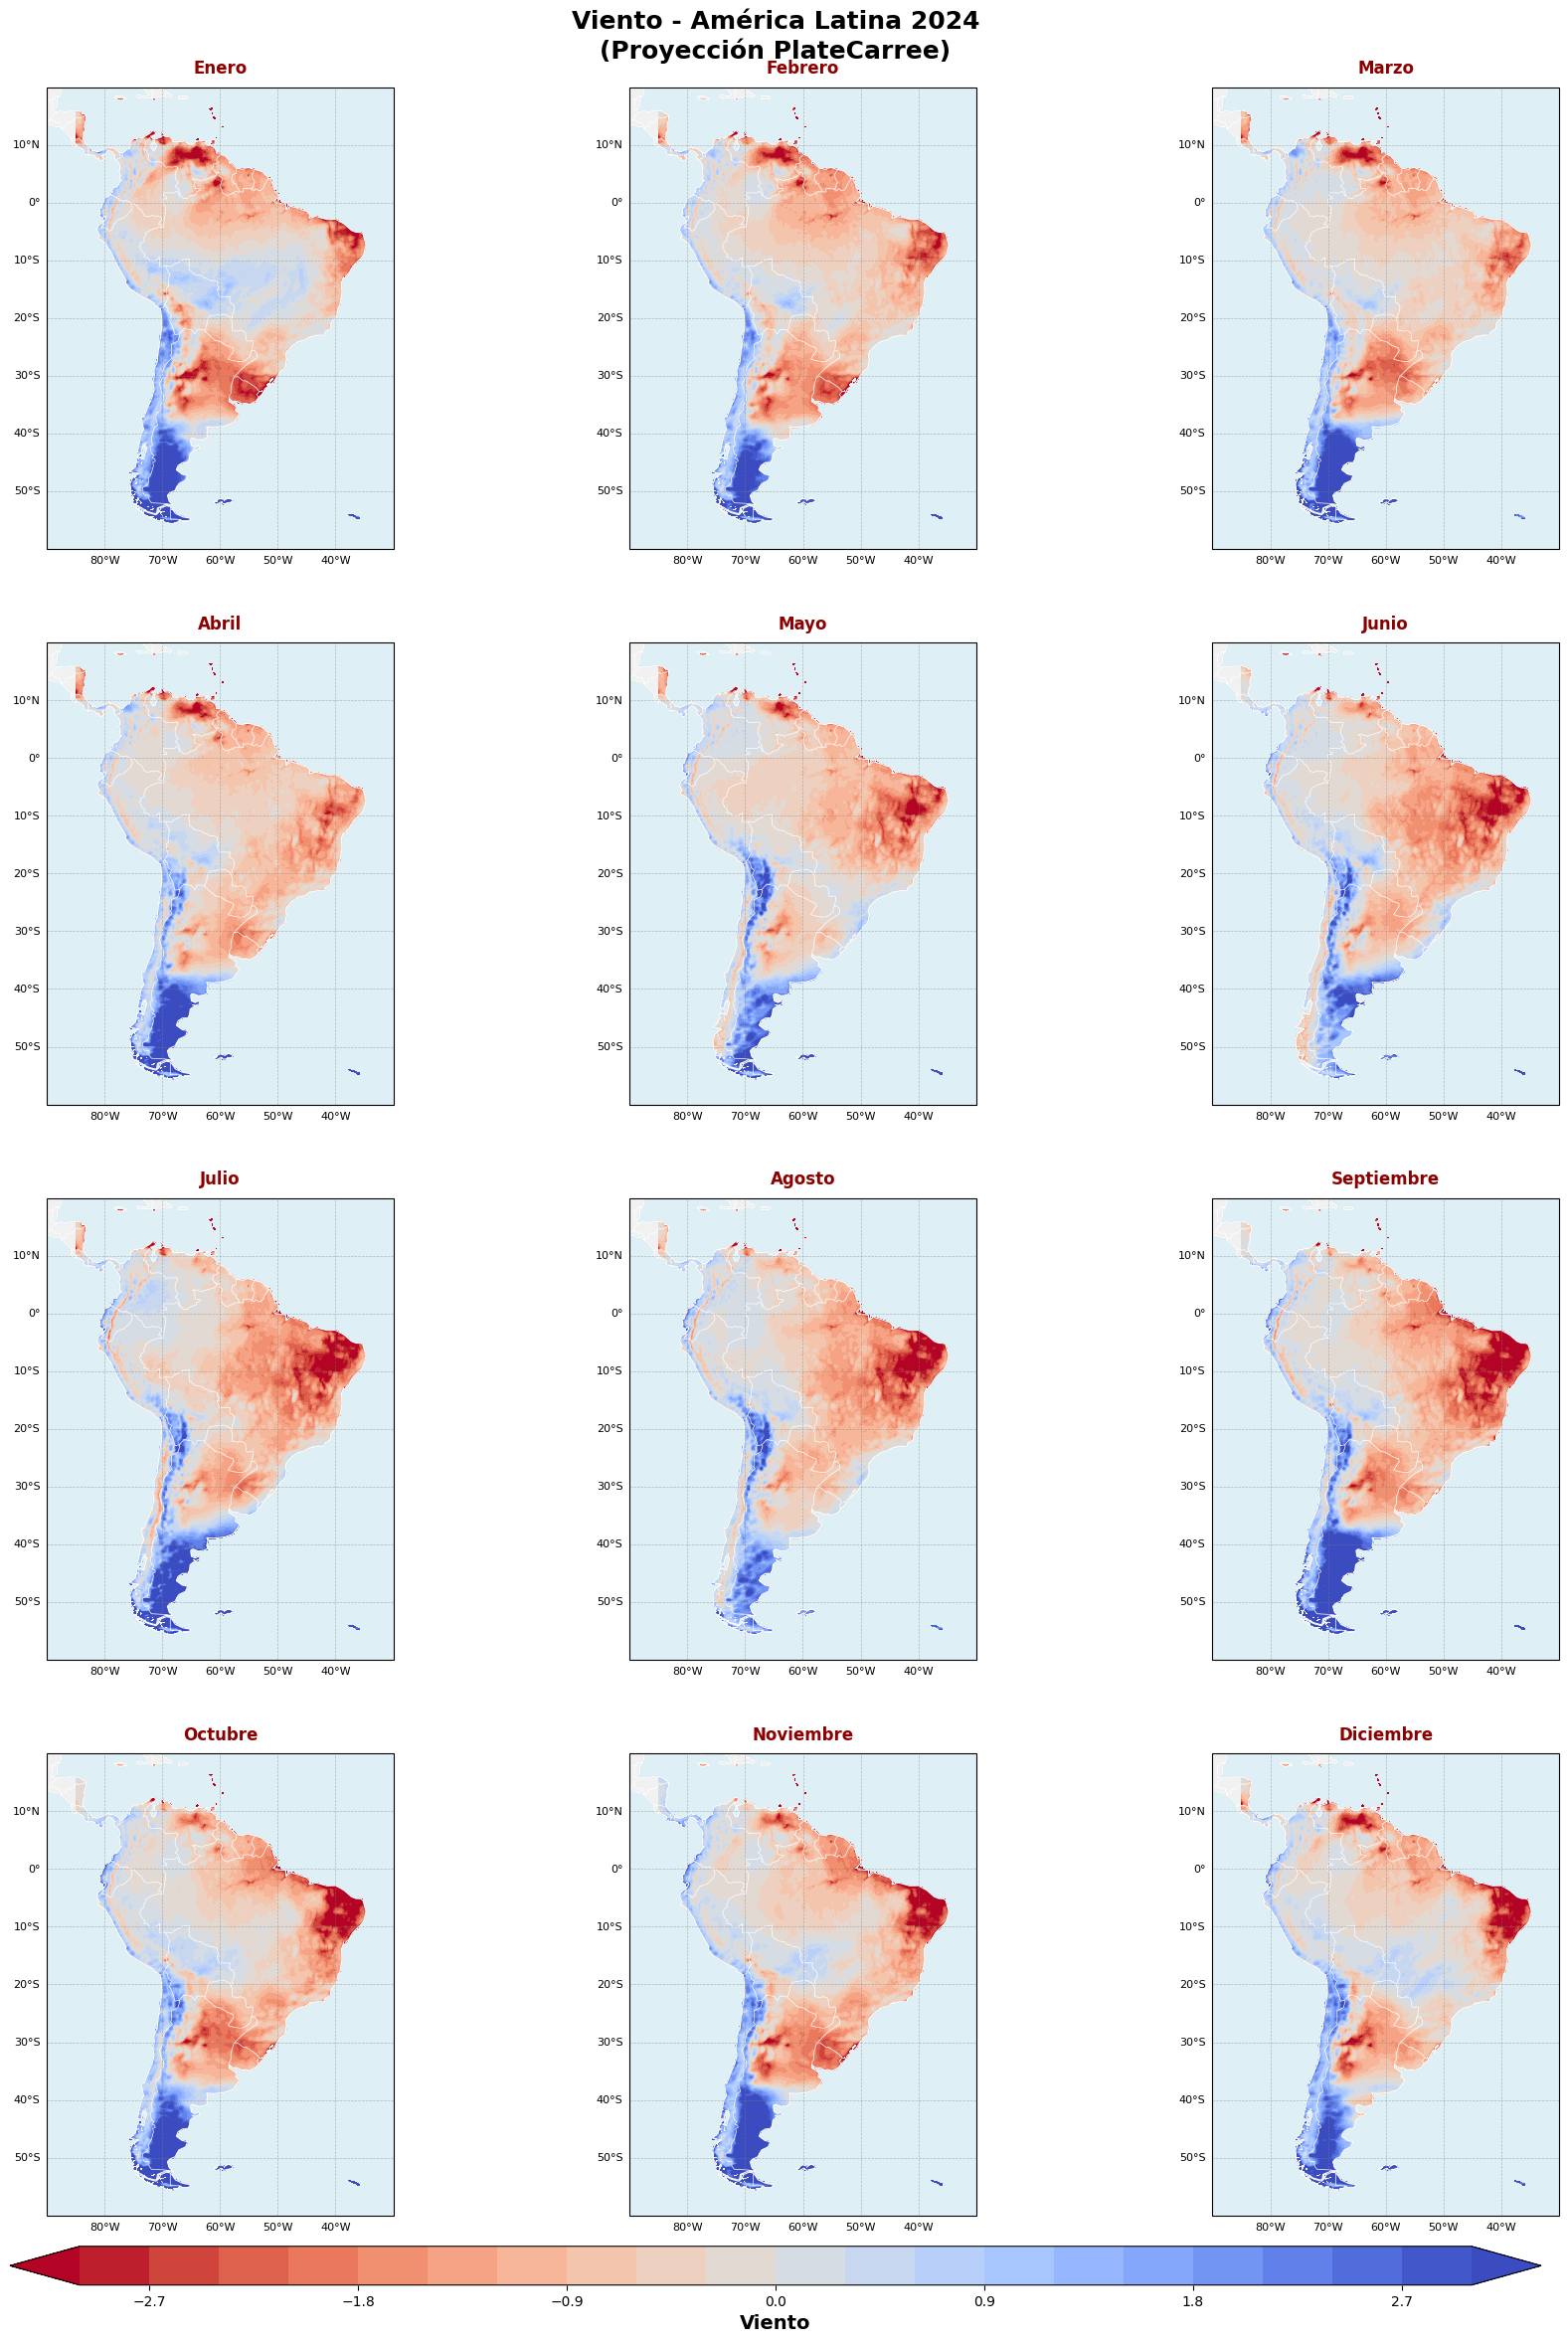

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(22, 26))
gs = GridSpec(5, 3, height_ratios=[1, 1, 1, 1, 0.06], hspace=0.25, wspace=0.1,top=0.95, bottom=0.08)

mappables = []

for i, month_num in enumerate(range(0, 12)):
    key = f"{month_num:02d}_24"

    if key in dict_met:
        data = dict_met[key].u10.mean(dim='valid_time')
        ax = fig.add_subplot(gs[i], projection=proj)

        mesh = ax.contourf(data.longitude, data.latitude, data,
                          transform=proj,
                          levels=np.linspace(-3, 3, 21),
                          cmap='coolwarm_r',
                          extend='both')

        ax.coastlines(linewidth=0.8, color='white')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='white')
        ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)
        ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.3)

        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                         alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}

        ax.set_extent([-90, -30, -60, 20], crs=proj)
        ax.set_title(f'{months[i]}', fontweight='bold', fontsize=12,
                    pad=10, color='darkred')

        mappables.append(mesh)

cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.015])
cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('Viento', fontsize=14, fontweight='bold')

plt.suptitle('Viento - América Latina 2024\n(Proyección PlateCarree)',
             fontsize=18, fontweight='bold', y=0.98)

plt.show()

Viento (eastward component) por temporadas en 2024 con proyección cartográfica

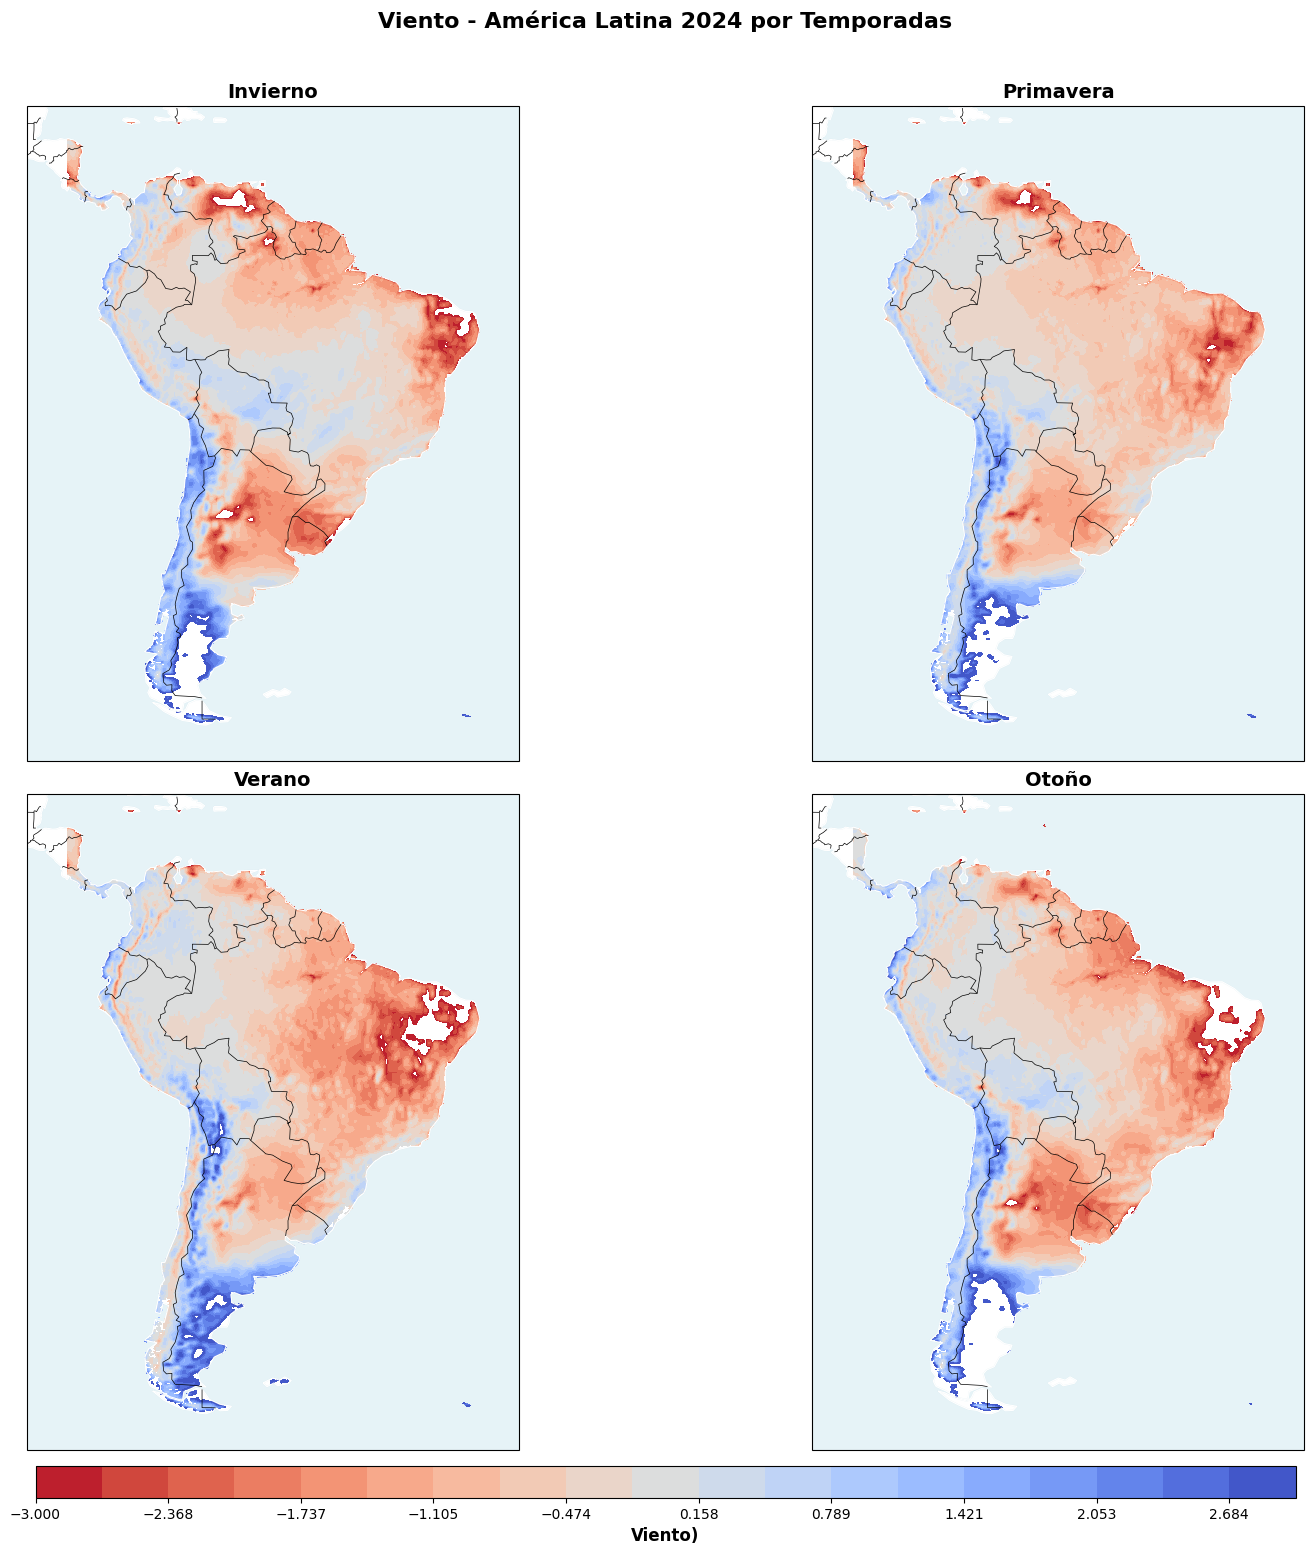

In [ ]:
estaciones = {
    'Invierno': ['11', '00', '01'],
    'Primavera': ['02', '03', '04'],
    'Verano': ['05', '06', '07'],
    'Otoño': ['08', '09', '10']
}


fig, axes = plt.subplots(2, 2, figsize=(18, 16),
                        subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
mappables = []

for i, (estacion, meses_estacion) in enumerate(estaciones.items()):
    datos_estacion = []

    for mes in meses_estacion:
        key = f"{int(mes):02d}_24"
        if key in dict_met:
            data_mes = dict_met[key].u10.mean(dim='valid_time')
            datos_estacion.append(data_mes)

    if datos_estacion:
        data_concat = xr.concat(datos_estacion, dim='time')
        data_estacional = data_concat.mean(dim='time')

        mesh = axes[i].contourf(data_estacional.longitude,
                               data_estacional.latitude,
                               data_estacional,
                               transform=ccrs.PlateCarree(),
                               levels=np.linspace(-3, 3, 20),
                               cmap='coolwarm_r')

        axes[i].coastlines(linewidth=0.8, color='white')
        axes[i].add_feature(cfeature.BORDERS, linewidth=0.5)
        axes[i].add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)
        axes[i].add_feature(cfeature.LAND, color='white', alpha=0.2)
        axes[i].set_extent([-90, -30, -60, 20], crs=ccrs.PlateCarree())
        axes[i].set_title(f'{estacion}', fontweight='bold', fontsize=14)

        mappables.append(mesh)

plt.tight_layout()

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])

if mappables:
    cbar = fig.colorbar(mappables[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Viento)', fontsize=12, fontweight='bold')

plt.subplots_adjust(top=0.92, bottom=0.08)
plt.suptitle('Viento - América Latina 2024 por Temporadas',
             fontsize=16, fontweight='bold')
plt.show()

# Conclusión
### Radiación
Respecto a la radiación, los países latinoamericanos con los niveles más altos son chile y argentina. La estación en la que más de intensifica es verano. En Chile y el norte de Argentina se encuentra el Desierto de Atacama, y sus regiones andinas se traducen en menos atmósfera para absorber radiación. También es una zona baja en precipitaciones y humedad relativa. La combinación única de latitud tropical, altitud elevada, extrema sequedad y cielos permanentemente despejados crea las condiciones ideales para máxima radiación solar en esta región.
### Viento
Los mapas permiten ver la magnitud y direcciòn de los vientos, pues entre más oscuro el color, más fuerte, y si es azul o rojo (positivo o negativo), indica su dirección. El viento que viene del Pacífico se ve detenido por la Cordillera de los Andes, y el viento que viene de el Atlántico afecta principalmente a brazil, Venezuela y Colombia, que son regiones costeras. Generalizando el cono sur (Chile y Argentina, principalmente) son los países que experimentan vientos más fuertes, y estos vientos vienen de océano pacífico.


En conclusión, en latinoamérica los países con mayor oportunidad de desarrollar proyectos de energía renovable exitosos son Chile y Argentina, tanto para energía eólica como solar.